# Introduction: Machine Learning Project Part 2: Advanced Techniques in Content Moderation

In the second part of our machine learning journey, we delve deeper into content moderation on digital platforms, utilizing more advanced techniques. Our aim is to refine our model's ability to identify and categorize harmful content accurately, an essential task in maintaining respectful and safe online interactions. This phase represents a progression in our supervised classification challenge.

We focus on the following key steps:

1. **Enhanced Data Preprocessing**: Building upon our initial preprocessing, we further refine the Jigsaw Toxic Comment Classification Dataset for advanced modeling techniques.
2. **Sophisticated Model Exploration**: Exploring a range of more complex models, including RNNs and pre-trained Transformers, to improve our classification accuracy.
3. **In-depth Model Training and Evaluation**: Intensively training our models and evaluating their performance with a focus on metrics such as accuracy and F1-score, crucial for handling the subtleties of toxic content classification.
4. **Result Analysis**: Deep diving into the outcomes of our models to gain better insights into their predictive capabilities and decision-making processes.

This part of the project is geared towards leveraging sophisticated machine learning models to elevate our content moderation capabilities.


In [103]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import re for regular expressions
import re

# Import train_test_split from sklearn.model_selection

from sklearn.model_selection import train_test_split

# Import stopwords and word_tokenize from nltk.corpus and nltk.tokenize respectively
# Stopwords are used to remove common but unimportant words from text data
# word_tokenize is used for splitting strings into tokens (words)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Import matplotlib.pyplot for data visualization

import matplotlib.pyplot as plt

# Import numpy for numerical operations
import numpy as np


# Loading and Data Preprocessing

Data preprocessing is a critical stage in our machine learning pipeline. In this phase, we load our training and test datasets and apply a series of preprocessing steps. These steps are designed to clean and standardize the text data, making it more suitable for analysis. We lower case the text, remove URLs, non-alphanumeric characters, and excess whitespaces. Additionally, we focus on removing stopwords, which are frequently occurring words that may not contribute significant meaning in the context of toxic comment classification. This thorough preprocessing helps in reducing noise and improving the model's focus on relevant textual features.



In [104]:
# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    cleaned_text = ' '.join([word for word in words if word not in stop_words])
    return cleaned_text.strip()  # Strip spaces after processing

def preprocess_text(text: str):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text).strip()  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).strip()  # Remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra white spaces
    text = remove_stopwords(text)
    text = text.strip()
    return text

def preprocess_data(series: pd.Series):
    series = series.apply(preprocess_text)
    return series


In [106]:
# Load and preprocess the training data
train_file_path = 'data/train.csv'
data = pd.read_csv(train_file_path)

data['comment_text'] = preprocess_data(data['comment_text'])
data = data[data["comment_text"] != ""]
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww matches background colour im seemingly st...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time asking view completely contradicts...,0,0,0,0,0,0
159567,ffea4adeee384e90,ashamed horrible thing put talk page 128611993,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres actual article prostitution...,0,0,0,0,0,0
159569,fff125370e4aaaf3,looks like actually put speedy first version d...,0,0,0,0,0,0


In [107]:
# Load and preprocess the test data
test_file_path = 'data/test.csv'
test_label_path = 'data/test_labels.csv'
test_data = pd.read_csv(test_file_path)
test_labels = pd.read_csv(test_label_path)

# Merge/join the dataframes based on the 'id' column
merged_data = pd.merge(test_data, test_labels, on='id')

merged_data['comment_text'] = preprocess_data(merged_data['comment_text'])
merged_data = merged_data[merged_data["comment_text"] != ""]

# there are alot of comments that are not givien any labels so just filtering those out
filtered_test_data = merged_data[merged_data.iloc[:, 2:].sum(axis=1)>=0] 

x_test = filtered_test_data['comment_text']
y_test = filtered_test_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].to_numpy()

filtered_test_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,thank understanding think highly would revert ...,0,0,0,0,0,0
7,000247e83dcc1211,dear god site horrible,0,0,0,0,0,0
11,0002f87b16116a7f,somebody invariably try add religion really me...,0,0,0,0,0,0
13,0003e1cccfd5a40a,says right type type institution needed case t...,0,0,0,0,0,0
14,00059ace3e3e9a53,adding new product list make sure relevant add...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
153150,fff8f64043129fa2,jerome see never got around im surprised looke...,0,0,0,0,0,0
153151,fff9d70fe0722906,lucky bastard heh famous kida envy congrats,0,0,0,0,0,0
153154,fffa8a11c4378854,shame want speak gays romanians,0,0,0,0,0,0
153155,fffac2a094c8e0e2,mel gibson nazi bitch makes shitty movies much...,1,0,1,0,1,0


In [108]:
y_test = np.insert(y_test, 0, 0, axis=1)

# filling up extra class
y_test[y_test.sum(axis=1) == 0, 0] = 1

# Dataset Visualization and Imbalance Analysis
Understanding the distribution of our data is crucial for building effective machine learning models. This section is dedicated to visualizing the distribution of comments across various toxicity categories. We generate bar plots to visually assess the number of occurrences in each category, highlighting any significant imbalances. Imbalanced datasets can lead to biased models, so this analysis is pivotal in guiding how we approach model training, particularly in choosing strategies to handle class imbalances effectively.


Text(0.5, 0, 'category')

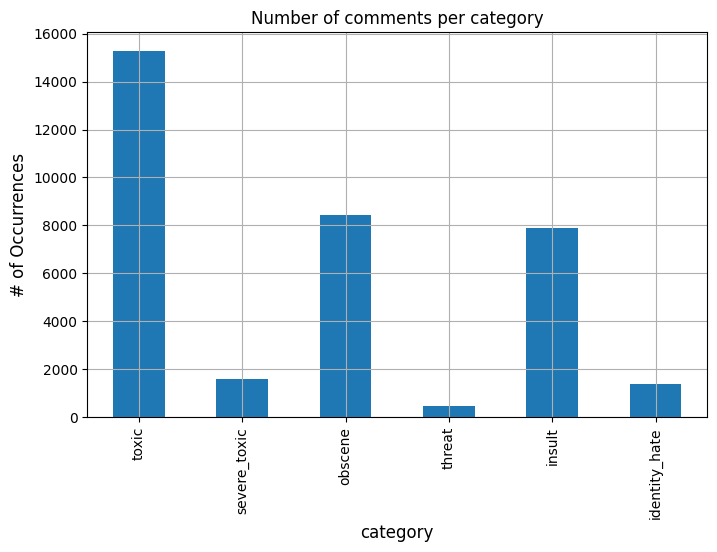

In [109]:
# reference from https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5
# to visualize the number of comments per category
df_stats = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()
df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)
# this show that it is very imablannced dataset

In [110]:
# After analyzing the above setup, it hit us that they don't add up to the total number of comments
# It means some comments are untagged/unlabeled
labels_per_comment = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)
labels_per_comment.value_counts()
# This shows that most of the comments have 0 labels
# This can be explained by the fact that most of the comments are not toxic in any nature
# Can be considered as negative class

0    143312
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: count, dtype: int64

# Training Data Preparation
As we embark on training our advanced models, the preparation of our training data becomes paramount. In this stage, we split our preprocessed dataset into training and validation sets, following an 85-15% ratio. This segregation is crucial for unbiased model training and provides a reliable basis for validation. The split ensures we have a robust dataset for training while reserving a significant portion for evaluating the model's performance on unseen data.

In [111]:
# Splitting the training data into training and validation sets (85% - 15%)
train_data, val_data = train_test_split(data, test_size=0.15, random_state=42)
train_data.shape, val_data.shape

((135606, 8), (23931, 8))

In [112]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

x_train = train_data['comment_text'].to_numpy()
x_val = val_data['comment_text'].to_numpy()

y_train = train_data[categories].to_numpy()
y_val = val_data[categories].to_numpy()

In [113]:
categories = ['none', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
# add zero class in all ys
y_train = np.insert(y_train, 0, 0, axis=1)
y_val = np.insert(y_val, 0, 0, axis=1)

# filling up extra class
y_train[y_train.sum(axis=1) == 0, 0] = 1
y_val[y_val.sum(axis=1) == 0, 0] = 1

y_train.shape, y_val.shape

((135606, 7), (23931, 7))

# Addressing Class Imbalance through Sampling Techniques
Class imbalance is a common challenge in datasets involving categories with disproportionate representation. In our case, the imbalance could significantly affect the performance and fairness of the model. To address this, we implement a sampling technique using the LeastSampledClassSampler. This approach helps in creating a more evenly distributed dataset for training purposes. We demonstrate the effectiveness of this technique by comparing the original and oversampled distributions through visualizations. Ensuring a balanced training dataset is crucial for developing a model that is not biased toward the majority class and can recognize all categories effectively.


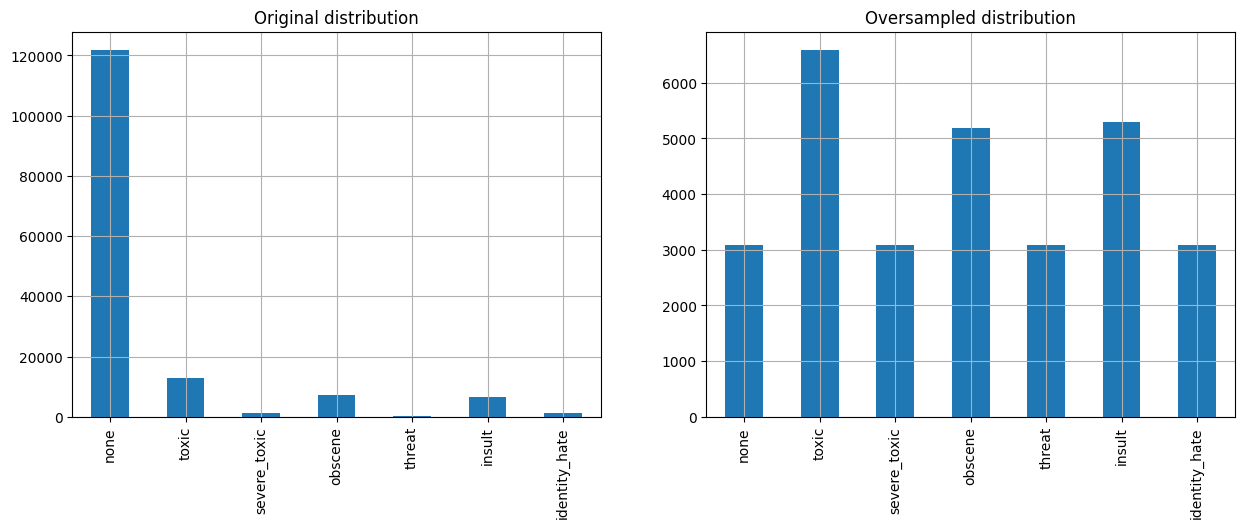

In [114]:
"""
As our data is really imbalanced we are going to try out a sampling mehtod here
https://github.com/issamemari/pytorch-multilabel-balanced-sampler
We are going to use LeastSampleClassSampler which will choose the least used class
as the next sample
We can verify it by sampling 10000 examples from our data
"""
import torch
from pytorch_multilabel_balanced_sampler.samplers import RandomClassSampler, ClassCycleSampler, LeastSampledClassSampler


fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15, 5))

# Original distribution
pd.DataFrame(y_train, columns=categories).sum().plot(ax=axes[0], x='category', y='number_of_comments', kind='bar', grid=True, title="Original distribution")


sampler = LeastSampledClassSampler(labels=torch.from_numpy(y_train), indices=range(len(y_train)))

inds = []
for sample in sampler:
    inds.append(sample)
    if len(inds) == 10000:
        break

# Oversampled distribution
pd.DataFrame(y_train[inds], columns=categories).sum().plot(ax=axes[1], x='category', y='number_of_comments', kind='bar', grid=True, title="Oversampled distribution")

plt.show()

# now you can see after overssampling the distribution is fairly even
# We will be using it for our training now

- The none class you can see here in the above graph is the class that has no label(no label is 1, all labels were zero for a particular comment), so we put that in the none class to balance things out, as seen in the second graph side by side.

In [124]:
from torch.utils.data import DataLoader, Dataset
from gpt4all import Embed4All

class CustomDataset(Dataset):
    def __init__(self, texts, y):
        self.feature_extractor = feature_extractor
        self.texts = texts
        self.x = [None] * len(texts)
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        if self.x[idx] is None:
            #self.x[idx] = torch.tensor(self.feature_extractor(preprocess_text(self.texts[idx])))
            self.x[idx] = torch.tensor(self.feature_extractor(self.texts[idx]))

        return self.x[idx], self.y[idx]


#sampler = LeastSampledClassSampler(labels=torch.from_numpy(y_train), indices=range(len(y_train)))


# Create datasets
train_dataset = CustomDataset(x_train, torch.tensor(y_train, dtype=torch.float))
val_dataset = CustomDataset(x_val, torch.tensor(y_val, dtype=torch.float))

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=2048, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=2048, shuffle=False)

# Deep Dive into Model Architecture and Training
This section delves into the architecture and training of our custom multi-label classification model. We construct a neural network tailored for this specific task, considering the nuances of multi-label text classification. The model consists of linear layers with ReLU activations, designed to handle the high-dimensional feature space typical of text data. Training the model involves not only feeding the data through the network but also optimizing the weights using backpropagation and an Adam optimizer. We train the model over several epochs, monitoring the loss to ensure that the model learns effectively from the training data. This process is crucial for developing a model capable of accurately classifying toxic comments.


In [126]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.nn import BCEWithLogitsLoss
from tqdm import tqdm

# Custom model for multi-label sequence classification
class Classifier(torch.nn.Module):
    def __init__(self, num_labels):
        super(Classifier, self).__init__()
        self.num_labels = num_labels
        
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(384, 768), 
            torch.nn.ReLU(), 
            torch.nn.Linear(768, 384),
            torch.nn.ReLU(),
            torch.nn.Linear(384, num_labels)
        )

    def forward(self, input, labels=None):
        logits = self.classifier(input)

        if labels is not None:
            loss_fn = BCEWithLogitsLoss()
            #loss_fn = focal_binary_cross_entropy
            loss = loss_fn(logits, labels)
            return loss, logits
        else:
            return logits

# Initialize custom model
model = Classifier(num_labels=len(categories))

# Define optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)


device = "cuda"
# Train the model
epochs = 10
model = model.to(device)
for epoch in range(epochs):
    model.train()
    pbar = tqdm(train_loader)
    for batch in pbar:
        input, labels = batch
        input = input.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        loss, logits = model(input, labels=labels)
        loss.backward()
        optimizer.step()

        pbar.set_description(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


  0%|          | 0/67 [00:00<?, ?it/s]

Epoch 10/10, Loss: 0.0076: 100%|██████████| 67/67 [00:36<00:00,  1.83it/s]


# Detailed Model Evaluation and Metric Analysis
The final step in our machine learning pipeline is the evaluation of the model's performance on the test dataset. This critical phase involves using the test data to assess how well our model generalizes to new, unseen data. We employ a range of evaluation metrics, including accuracy, precision, recall, and F1-score, to provide a comprehensive view of the model's performance across different aspects. Accuracy helps us understand the overall correctness of the model, while precision and recall provide insights into its performance in identifying positive cases. The F1-score, a harmonic mean of precision and recall, is particularly useful in the context of imbalanced datasets. We present the evaluation results in a detailed classification report and use confusion matrices to visualize the model's performance across different categories. This thorough evaluation is vital to ensure that our model is effective, fair, and ready to perform well 


In [127]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, multilabel_confusion_matrix
# Evaluate the model
model.eval()

# Create datasets
test_dataset = CustomDataset(x_test.to_numpy(), torch.tensor(y_test, dtype=torch.float))

# Create dataloaders
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

y_pred = []
y_true = []
with torch.no_grad():
    for batch in tqdm(test_loader):
        input, labels = batch
        input = input.to(device)
        labels = labels.to(device)
        logits = model(input)
        y_pred.extend(logits.sigmoid().round().tolist())
        y_true.extend(labels.tolist())

print(classification_report(y_true, y_pred, target_names=categories))


  0%|          | 0/63 [00:00<?, ?it/s]

100%|██████████| 63/63 [15:22<00:00, 14.65s/it]

               precision    recall  f1-score   support

         none       0.95      0.96      0.96     57331
        toxic       0.64      0.53      0.58      6090
 severe_toxic       0.11      0.71      0.19       367
      obscene       0.67      0.58      0.62      3691
       threat       0.19      0.55      0.28       211
       insult       0.57      0.53      0.55      3427
identity_hate       0.26      0.77      0.39       712

    micro avg       0.85      0.88      0.86     71829
    macro avg       0.49      0.66      0.51     71829
 weighted avg       0.88      0.88      0.88     71829
  samples avg       0.90      0.91      0.90     71829




/home/junaid/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
